In [12]:
pickle_path = r"C:\Users\robot\code\pipelines\apply_biomass\code\models\all00\gbr\all00_rs0_GBR_p99_std3_all0_RMSE_sel_num_12redo\AGB_GBR_rs50_no_header_model.pickle"
test_path = r'C:\Users\robot\code\pipelines\apply_biomass\code\models\all00\gbr\all00_rs0_GBR_p99_std3_all0_RMSE_sel_num_12redo\rs50_test_data.csv'

C:\Users\robot\anaconda3\envs\tf_grid2.13_biomass_apply\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


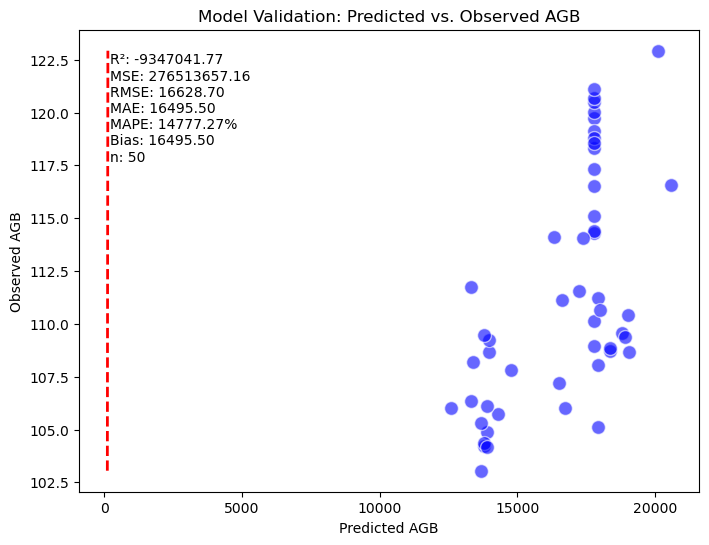

In [13]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Load the model from the pickle file
with open(pickle_path, 'rb') as file:
    model = pickle.load(file)


# Load the CSV file for validation data
data = pd.read_csv(test_path, header=0)
# Separate features (X_val) and target (y_val)
# Assuming the last column is the target (AGB)
y_val = data.iloc[:, -1]      # Last column as target
X_val = data.iloc[:, :-1]      # All other columns as features

# Generate predictions using the loaded model
y_pred = model.predict(X_val)

# Calculate performance metrics
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred) * 100
bias = (y_pred - y_val).mean()
n = len(y_val)

# Create a scatter plot for validation
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_val, color='blue', alpha=0.6, edgecolors='w', s=100)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel("Predicted AGB")
plt.ylabel("Observed AGB")
plt.title("Model Validation: Predicted vs. Observed AGB")

# Display metrics on the plot
plt.text(0.05, 0.95, f"R²: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}%\nBias: {bias:.2f}\nn: {n}", 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.show()

In [ ]:
import pickle

# Function to load model and retrieve the number of features
def get_number_of_features(pickle_file_path):
    with open(pickle_file_path, 'rb') as file:
        model = pickle.load(file)
        
        # Retrieve the feature names based on the model type
        if hasattr(model, 'feature_names_in_'):
            # For scikit-learn models
            feature_names = model.feature_names_in_
        elif hasattr(model, 'get_booster'):
            # For XGBoost models
            feature_names = model.get_booster().feature_names
        else:
            # If the model does not store feature names directly
            raise AttributeError("The model does not provide access to feature names.")
        
        # Return the number of features
        return len(feature_names)

# Paths to the two pickle files
pickle_file_1 = 'path_to_your_first_model.pkl'
pickle_file_2 = 'path_to_your_second_model.pkl'

# Get the number of features for each model
num_features_1 = get_number_of_features(pickle_file_1)
num_features_2 = get_number_of_features(pickle_file_2)

# Print the results
print(f"Number of features in the first model: {num_features_1}")
print(f"Number of features in the second model: {num_features_2}")

# Check if they match
if num_features_1 == num_features_2:
    print("Both models have the same number of required features.")
else:
    print("The models have a different number of required features.")


In [5]:


# Retrieve and print the feature names used during model training
if hasattr(model, 'feature_names_in_'):
    # For scikit-learn models that support feature_names_in_
    trained_features = model.feature_names_in_
elif hasattr(model, 'get_booster'):
    # For XGBoost models, accessing feature names from the booster
    trained_features = model.get_booster().feature_names
else:
    # For other models that don't provide direct access to feature names
    raise AttributeError("The model does not provide access to feature names.")

print("Features required by the model:")
print(trained_features)

Features required by the model:
['b4_dbi_p99' 'b4_dbi_dry_p99' 'b3_dp1_p99' 'b2_dbi_p99' 'b1_dp1_p99'
 'b2_dp1_p99' 'b3_dbi_dry_p99' 'b1_dbi_dry_p99' 'b1_dp1_dry_p99'
 'b2_dbi_dry_p99' 'b3_dbi_p99' 'b1_dbi_p99']


In [7]:
print(list(X_val))

['b4_dbi_dry_p99', 'b2_dbi_p99', 'b2_dp1_p99', 'b3_dbi_dry_p99', 'b1_dbi_dry_p99', 'b2_dbi_dry_p99', 'b3_dbi_p99', 'b1_dbi_p99', 'dbi_dry_CVI', 'dbi_dry_r43', 'b2_dp1_dry_p99', 'dbi_dry_MSR', 'dbi_r53', 'dbi_r65', 'b1_hmc_p99', 'b1_hcv_p99', 'b1_h99_p99']


In [4]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

# Load the model from the pickle file
with open(r'C:\Users\robot\code\pipelines\apply_biomass\code\models\all00\gbr\all00_rs0_GBR_p99_std3_all0_RMSE_sel_num_12redo\AGB_GBR_rs50_model.pickle', 'rb') as file:
    model = pickle.load(file)

# Load the CSV file for validation data
data = pd.read_csv(r'C:\Users\robot\code\pipelines\apply_biomass\code\models\all00\gbr\all00_rs0_GBR_p99_std3_all0_RMSE_sel_num_12redo\rs50_test_data.csv')
y_val = data['AGB']
X_val = data.drop(columns=['AGB', 'AGB.1'])

# Generate predictions using the loaded model
y_pred = model.predict(X_val)

# Calculate performance metrics
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred) * 100
bias = (y_pred - y_val).mean()
n = len(y_val)

# Create a scatter plot for validation
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_val, color='blue', alpha=0.6, edgecolors='w', s=100)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel("Predicted AGB")
plt.ylabel("Observed AGB")
plt.title("Model Validation: Predicted vs. Observed AGB")

# Display metrics on the plot
plt.text(0.05, 0.95, f"R²: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}%\nBias: {bias:.2f}\nn: {n}", 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- b1_h99_p99
- b1_hcv_p99
- b1_hmc_p99
- b2_dp1_dry_p99
- dbi_dry_CVI
- ...
Feature names seen at fit time, yet now missing:
- b1_dp1_dry_p99
- b1_dp1_p99
- b3_dp1_p99
- b4_dbi_p99


In [3]:
data

,AGB,AGB.1,b4_dbi_dry_p99,b2_dbi_p99,b2_dp1_p99,b3_dbi_dry_p99,b1_dbi_dry_p99,b2_dbi_dry_p99,b3_dbi_p99,b1_dbi_p99,dbi_dry_CVI,dbi_dry_r43,b2_dp1_dry_p99,dbi_dry_MSR,dbi_r53,dbi_r65,b1_hmc_p99,b1_hcv_p99,b1_h99_p99
0,7552.965000,7552.965000,2257.00,541.00,48.84,747.84,303.92,539.64,788.48,324.68,55964032,31765002,50.92,7831877,33965272,5448250,107.110495,159.950507,114.320412
1,20805.217611,20805.217611,2134.59,498.01,58.78,596.68,273.79,468.00,645.96,301.00,55357808,37064379,57.34,9258465,31644913,5597078,111.500774,152.918340,119.763184
2,11596.200000,11596.200000,2268.24,822.24,35.76,1015.44,406.40,709.64,1232.16,469.12,51902621,24815103,37.92,5755877,20576003,6675594,106.756621,149.249608,111.234665
3,23704.695000,23704.695000,2498.36,603.52,52.92,665.60,287.84,524.36,793.00,374.36,59773040,37433582,54.00,9359865,29253952,4933845,110.811784,155.187023,119.137236
4,6360.200000,6360.200000,1796.88,581.72,29.00,789.96,344.48,538.20,848.84,334.40,48489960,26854071,45.60,6392991,31411513,6671216,104.359185,161.991794,110.133464
5,0.000000,0.000000,2183.68,892.36,6.00,1299.00,632.28,931.76,1296.92,656.00,34145884,16384171,4.92,2799601,23547213,6457619,105.170660,158.348010,104.241269
6,0.000000,0.000000,3142.80,1073.68,1.92,1487.48,529.92,975.28,1504.68,762.08,49990878,21831242,16.92,4778632,20418608,6802095,105.234059,145.497172,108.654300
7,13212.727500,13212.727500,2020.95,631.85,40.90,847.30,370.60,608.90,840.35,438.45,50054082,25263158,37.95,5899430,25626604,6263039,110.199236,152.614150,118.328299
8,7275.590000,7275.590000,2011.40,458.92,54.92,596.40,238.52,440.00,609.88,251.56,57001202,33542179,50.84,8324665,38965447,4985655,109.393345,171.311316,117.346600
9,11338.127500,11338.127500,2147.70,499.40,59.00,726.20,349.70,510.10,726.20,346.70,60014421,30948594,54.00,7593904,30106465,4725118,110.899821,172.503781,120.023185
